In [3]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk
import seaborn as sns
from gensim.models import word2vec
from tqdm import tqdm
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


import pickle

pickle_file = open("C:\\Users\\snigd\\forTSNE_Data_Cleaned_07092020_113759.df",'rb')
## forTSNE_Data_Cleaned_08092020_083631.df
##forTSNE_Data_Cleaned_07092020_113759.df

pickle_data = pickle.load(pickle_file)
df = pd.DataFrame(pickle_data)

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\snigd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
df.head(5)

0                           Org   OrgSector RverMonthYear RverReviewer  \
1  Instone Real Estate Group AG  Immobilien      May 2020            1   
2  Instone Real Estate Group AG  Immobilien      May 2020            2   
3  Instone Real Estate Group AG  Immobilien      May 2020            3   
4  Instone Real Estate Group AG  Immobilien  October 2019            4   
5  Instone Real Estate Group AG  Immobilien  October 2019            5   

0                       RverPosition  \
1         Führungskraft / Management   
2     Angestellte/r oder Arbeiter/in   
3     Angestellte/r oder Arbeiter/in   
4  Ex-Angestellte/r oder Arbeiter/in   
5         Führungskraft / Management   

0                                            RverLoc        RverRecom  \
1  Hat zum Zeitpunkt der Bewertung im Bereich Fin...        Empfohlen   
2  Hat zum Zeitpunkt der Bewertung im Bereich Rec...        Empfohlen   
3  Hat zum Zeitpunkt der Bewertung im Bereich Adm...        Empfohlen   
4  Hat im Bereich Personal / Aus- und Weiterbildu...  Nicht empfohlen   
5  Hat zum Zeitpunkt der Bewertung bei Instone Re...        Empfohlen   

0 RvReviewAbout RvScore                                          RvComment  \
1       Overall     4.9   Top Arbeitgeber mit vielen Benefiz      Trans...   
2       Overall     4.9   Vorbildlicher Arbeitgeber     Nur die Mülltre...   
3       Overall     4.5   Wenn Transparenz und Wertschätzung aufeinande...   
4       Overall     3.2   Anspruch und Wirklichkeit klaffen auseinander...   
5       Overall     4.8   Toller Arbeitgeber  Tolle Truppe  Auch bei lä...   

0  ...    topic10    topic11    topic12    topic13   topic14    topic15  \
1  ...  0.0357143  0.0357143  0.0357143  0.0357143  0.392857  0.0357143   
2  ...  0.0357143  0.0357143  0.0357143  0.0357143  0.392857  0.0357143   
3  ...          0          0          0   0.141893         0          0   
4  ...  0.0867504   0.290055          0          0         0          0   
5  ...  0.0113646  0.0113701  0.0113637  0.0113637  0.170235   0.124999   

0    topic16    topic17 forTSNEYear                forTSNECity  
1  0.0357143  0.0357143        2020           Erlangen, Bayern  
2  0.0357143  0.0357143        2020       Essen, Niedersachsen  
3  0.0817442  0.0743245        2020  Köln, Nordrhein-Westfalen  
4  0.0797098          0        2019       Essen, Niedersachsen  
5  0.0113637  0.0113647        2019       Essen, Niedersachsen  

[5 rows x 39 columns]

In [6]:
df['forTSNECity'].value_counts()

München, Bayern                  2310
NA                               1821
Berlin, Berlin                   1468
Frankfurt, Brandenburg           1040
Hamburg, Hamburg                  989
                                 ... 
Stein, Bayern                       1
Gengenbach, Baden-Württemberg       1
Lörrach, Baden-Württemberg          1
Stuhr, Niedersachsen                1
Oppenheim, Rheinland-Pfalz          1
Name: forTSNECity, Length: 466, dtype: int64

In [7]:
df.loc[((df.forTSNECity == 'NA')), 'forTSNECity'] = 'NA,NA'

In [9]:
def Tsne_State(location):
    #location = 'Essen, Niedersachsen'
    locationAsList = location.split(",")
    return locationAsList[1].strip()

df['forTSNEState'] = df['forTSNECity'].apply(Tsne_State)

In [10]:
df.shape

(20997, 40)

In [35]:
df.columns

Index(['Org', 'OrgSector', 'RverMonthYear', 'RverReviewer', 'RverPosition',
       'RverLoc', 'RverRecom', 'RvReviewAbout', 'RvScore', 'RvComment',
       'RvScoreWorkAtmosphere', 'RvScoreCohesionAmongColleagues',
       'RvScoreEqualRights', 'RvScoreDealingWithOlderColleagues',
       'RvScoreEnvironmentalSocialAwareness', 'Corona1', 'Corona2', 'Corona3',
       'RvScoreWorkLifeBalance', 'topic0', 'topic1', 'topic2', 'topic3',
       'topic4', 'topic5', 'topic6', 'topic7', 'topic8', 'topic9', 'topic10',
       'topic11', 'topic12', 'topic13', 'topic14', 'topic15', 'topic16',
       'topic17', 'forTSNEYear', 'forTSNECity', 'forTSNEState', 'x_axis',
       'y_axis'],
      dtype='object', name=0)

In [11]:
df.describe(include = 'all' )

0                    Org  OrgSector RverMonthYear RverReviewer  \
count              20997      20997         20997        20997   
unique               147         32           128           10   
top     Deutsche Post AG  Industrie     July 2019            4   
freq                1154       3458          1113         2162   
mean                 NaN        NaN           NaN          NaN   
std                  NaN        NaN           NaN          NaN   
min                  NaN        NaN           NaN          NaN   
25%                  NaN        NaN           NaN          NaN   
50%                  NaN        NaN           NaN          NaN   
75%                  NaN        NaN           NaN          NaN   
max                  NaN        NaN           NaN          NaN   

0                         RverPosition  \
count                            20997   
unique                              14   
top     Angestellte/r oder Arbeiter/in   
freq                             11473   
mean                               NaN   
std                                NaN   
min                                NaN   
25%                                NaN   
50%                                NaN   
75%                                NaN   
max                                NaN   

0                                                 RverLoc  RverRecom  \
count                                               20997      20997   
unique                                              11741          3   
top     Hat zum Zeitpunkt der Bewertung bei Siemens AG...  Empfohlen   
freq                                                   82      11692   
mean                                                  NaN        NaN   
std                                                   NaN        NaN   
min                                                   NaN        NaN   
25%                                                   NaN        NaN   
50%                                                   NaN        NaN   
75%                                                   NaN        NaN   
max                                                   NaN        NaN   

0      RvReviewAbout RvScore  \
count          20997   20997   
unique             1      41   
top          Overall     4.5   
freq           20997    1409   
mean             NaN     NaN   
std              NaN     NaN   
min              NaN     NaN   
25%              NaN     NaN   
50%              NaN     NaN   
75%              NaN     NaN   
max              NaN     NaN   

0                                               RvComment  ...  topic11  \
count                                               20997  ...  20997.0   
unique                                              19801  ...   8906.0   
top      Ich bin zufrieden mit der umgebung und der la...  ...      0.0   
freq                                                    4  ...   2059.0   
mean                                                  NaN  ...      NaN   
std                                                   NaN  ...      NaN   
min                                                   NaN  ...      NaN   
25%                                                   NaN  ...      NaN   
50%                                                   NaN  ...      NaN   
75%                                                   NaN  ...      NaN   
max                                                   NaN  ...      NaN   

0       topic12  topic13  topic14  topic15  topic16  topic17   forTSNEYear  \
count   20997.0  20997.0  20997.0  20997.0  20997.0  20997.0  20997.000000   
unique   5621.0   4057.0   5196.0   5970.0   5138.0   5751.0           NaN   
top         0.0      0.0      0.0      0.0      0.0      0.0           NaN   
freq     2418.0   2729.0   2459.0   1948.0   2142.0   2582.0           NaN   
mean        NaN      NaN      NaN      NaN      NaN      NaN   2017.475068   
std         NaN      NaN      NaN      NaN      NaN      NaN      2.321183   
min  

In [12]:
df_1 = df[['topic0', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5','topic6','topic7','topic8','topic9','topic10','topic11','topic12','topic13','topic14','topic15','topic16','topic17'#,'topic18','topic19','topic20','topic21','topic22'
            ]]
df_1.head(5)

0     topic0     topic1     topic2     topic3     topic4     topic5  \
1  0.0357143  0.0357143  0.0357143  0.0357143  0.0357143  0.0357143   
2  0.0357143  0.0357143  0.0357143  0.0357143  0.0357143  0.0357143   
3    0.14189          0          0          0          0          0   
4          0   0.224638          0          0          0          0   
5  0.0113637  0.0113637  0.0113637   0.193402  0.0113637    0.35226   

0     topic6     topic7     topic8     topic9    topic10    topic11  \
1  0.0357143  0.0357143  0.0357143  0.0357143  0.0357143  0.0357143   
2  0.0357143  0.0357143  0.0357143  0.0357143  0.0357143  0.0357143   
3   0.337175          0   0.141891          0          0          0   
4          0          0          0   0.224632  0.0867504   0.290055   
5  0.0113637  0.0113677  0.0113637  0.0113637  0.0113646  0.0113701   

0    topic12    topic13   topic14    topic15    topic16    topic17  
1  0.0357143  0.0357143  0.392857  0.0357143  0.0357143  0.0357143  
2  0.0357143  0.0357143  0.392857  0.0357143  0.0357143  0.0357143  
3          0   0.141893         0          0  0.0817442  0.0743245  
4          0          0         0          0  0.0797098          0  
5  0.0113637  0.0113637  0.170235   0.124999  0.0113637  0.0113647

In [13]:
df_1.columns

Index(['topic0', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5', 'topic6',
       'topic7', 'topic8', 'topic9', 'topic10', 'topic11', 'topic12',
       'topic13', 'topic14', 'topic15', 'topic16', 'topic17'],
      dtype='object', name=0)

In [14]:
for i in range(0, 18):
    col_name = 'topic' + str(i)
    df_1[col_name] = df_1[col_name].astype(float)
    
df_1.dtypes

0
topic0     float64
topic1     float64
topic2     float64
topic3     float64
topic4     float64
topic5     float64
topic6     float64
topic7     float64
topic8     float64
topic9     float64
topic10    float64
topic11    float64
topic12    float64
topic13    float64
topic14    float64
topic15    float64
topic16    float64
topic17    float64
dtype: object

In [15]:
result = df_1.to_numpy() 
result

array([[0.03571429, 0.03571429, 0.03571429, ..., 0.03571429, 0.03571429,
        0.03571429],
       [0.03571429, 0.03571429, 0.03571429, ..., 0.03571429, 0.03571429,
        0.03571429],
       [0.14188986, 0.        , 0.        , ..., 0.        , 0.08174422,
        0.07432454],
       ...,
       [0.03571433, 0.03571433, 0.03571433, ..., 0.03571433, 0.03571433,
        0.03571433],
       [0.02631581, 0.02631581, 0.28947333, ..., 0.02631581, 0.02631581,
        0.02631581],
       [0.03571429, 0.03571429, 0.03571429, ..., 0.03571429, 0.03571429,
        0.03571429]])

In [16]:
display(result.shape)

(20997, 18)

In [ ]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, perplexity=70, learning_rate=600, n_iter=2000, verbose=1, random_state=7, angle=.5, init='pca')
# 18-D -> 2-D #22-D -> 2-D
tsne_lda = tsne_model.fit_transform(result) # result is document-topic matrix from LDA

[t-SNE] Computing 211 nearest neighbors...
[t-SNE] Indexed 20997 samples in 0.233s...
[t-SNE] Computed neighbors for 20997 samples in 31.179s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20997
[t-SNE] Computed conditional probabilities for sample 2000 / 20997
[t-SNE] Computed conditional probabilities for sample 3000 / 20997
[t-SNE] Computed conditional probabilities for sample 4000 / 20997
[t-SNE] Computed conditional probabilities for sample 5000 / 20997
[t-SNE] Computed conditional probabilities for sample 6000 / 20997
[t-SNE] Computed conditional probabilities for sample 7000 / 20997
[t-SNE] Computed conditional probabilities for sample 8000 / 20997
[t-SNE] Computed conditional probabilities for sample 9000 / 20997
[t-SNE] Computed conditional probabilities for sample 10000 / 20997
[t-SNE] Computed conditional probabilities for sample 11000 / 20997
[t-SNE] Computed conditional probabilities for sample 12000 / 20997
[t-SNE] Computed conditional probabilities for s

In [ ]:
#tsne_docXtopic.dtype
#tsne_docXtopic_dataframe = pd.DataFrame(tsne_docXtopic)
tsne_topic_dataframe = pd.DataFrame(tsne_lda)
#--------tsne_topic_dataframe['OrgSector'] = df['OrgSector']
#tsne_topic_dataframe['OrgSector'] = pd['OrgSector']
#tsne_docXtopic_dataframe
#tsne_topic_dataframe.shape
df_copy = df

In [47]:
tsne_topic_dataframe.shape

(20997, 2)

In [48]:
tsne_topic_dataframe.head(3)

0          1
0  130.191650  26.223505
1  132.417374  25.083807
2   -3.250540 -76.748184

In [49]:
tsne_topic_dataframe_copy = tsne_topic_dataframe.copy()
#tsne_topic_dataframe.shape
#tsne_topic_dataframe.tail(2)
#top_row = pd.DataFrame({0:['delete'],1:['delete2']})
#top_row
#tsne_topic_dataframe_copy = pd.concat([top_row, tsne_topic_dataframe_copy]).reset_index(drop = True)
tsne_topic_dataframe_copy

0          1
0      130.191650  26.223505
1      132.417374  25.083807
2       -3.250540 -76.748184
3      -86.470795  -5.752817
4      -39.862389  44.931759
...           ...        ...
20992   78.799828 -35.386887
20993  -93.982635 -30.488417
20994   19.266964  92.202995
20995   48.133171 -29.609549
20996  132.417374  25.083807

[20997 rows x 2 columns]

In [50]:
df_copy.head(2)
#df_copy.shape
df_copy.tail(2)

0                         Org                      OrgSector  RverMonthYear  \
20996  KWS SAAT SE & Co. KGaA  Nahrungsmittel/Landwirtschaft  February 2019   
20997  KWS SAAT SE & Co. KGaA  Nahrungsmittel/Landwirtschaft  December 2017   

0     RverReviewer                    RverPosition  \
20996            5  Angestellte/r oder Arbeiter/in   
20997            8  Angestellte/r oder Arbeiter/in   

0                                                RverLoc  RverRecom  \
20996  Hat zum Zeitpunkt der Bewertung im Bereich Fin...  Empfohlen   
20997  Hat zum Zeitpunkt der Bewertung im Bereich Ver...  Empfohlen   

0     RvReviewAbout RvScore  \
20996       Overall     4.5   
20997       Overall     5.0   

0                                              RvComment  ...    topic13  \
20996   Sehr gute Stimmung im Team und interessante A...  ...  0.0263158   
20997   Innovativer Arbeitgeber mit besten kollegiale...  ...  0.0357143   

0        topic14    topic15    topic16    topic17 forTSNEYear  \
20996  0.0263158  0.0263158  0.0263158  0.0263158        2019   
20997   0.392857  0.0357143  0.0357143  0.0357143        2017   

0                 forTSNECity   forTSNEState     x_axis     y_axis  
20996  Einbeck, Niedersachsen  Niedersachsen  99.915428  12.372225  
20997  Einbeck, Niedersachsen  Niedersachsen        NaN        NaN  

[2 rows x 42 columns]

In [51]:
tsne_topic_dataframe_copy[0].head(3)

0    130.191650
1    132.417374
2     -3.250540
Name: 0, dtype: float32

In [52]:
tsne_topic_dataframe_copy[1].head(3)

0    26.223505
1    25.083807
2   -76.748184
Name: 1, dtype: float32

In [53]:
df_copy['x_axis']=tsne_topic_dataframe_copy[0]
df_copy['y_axis']=tsne_topic_dataframe_copy[1]

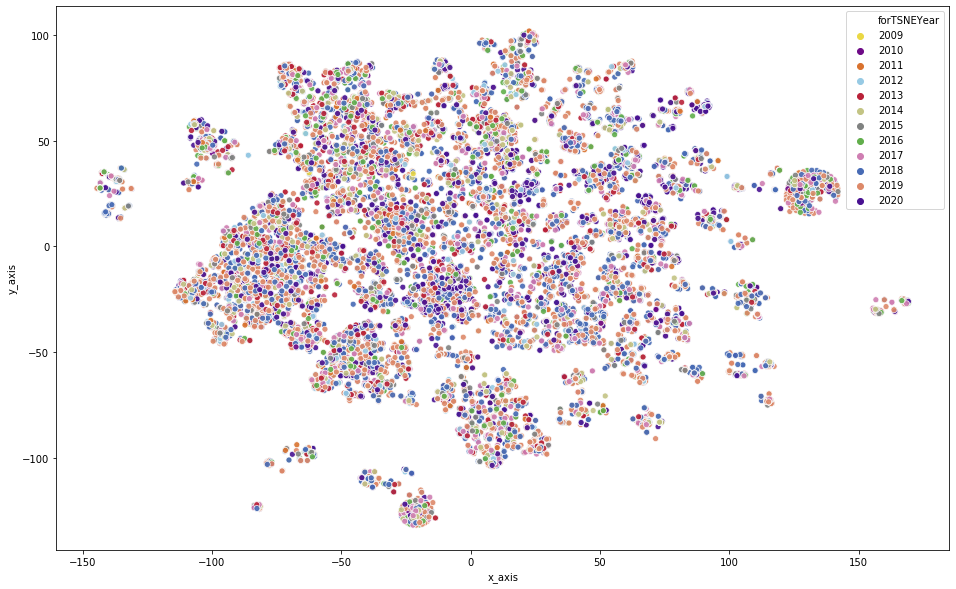

In [87]:
# reviews and forTSNEYear
plt.figure(figsize=(16,10))

colors = ["#ead844", "#6e0a87", "#d9722e", "#97cae4", "#b92138", "#c3c484", "#808281", "#61ae4b", "#cf7eb2", "#476bb5", "#dd8969", "#481191", "#dcab35", "#92008c", "#e6f55e", "#7d1a13", "#93b841", "#6e3715", "#d0322a", "#2b3919"]
colors2 = colors[:df_copy['forTSNEYear'].nunique()]

sns.scatterplot(
    x='x_axis', y='y_axis',
    hue=df_copy['forTSNEYear'],
    data=df_copy[['x_axis','y_axis']],
    legend="full",
    alpha=0.9,
    #palette= sns.color_palette('magma',df_copy['forTSNEYear'].nunique())
    palette= sns.color_palette(colors2)
    
)
#sns.palplot(sns.color_palette("RdBu", 10))

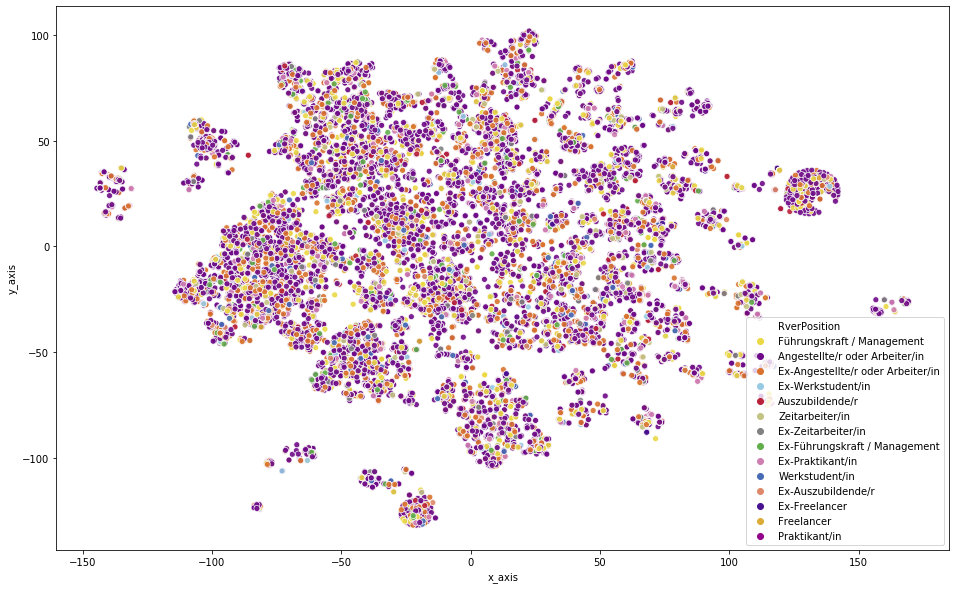

In [70]:
# reviews and RverPosition
plt.figure(figsize=(16,10))
colors2 = colors[:df_copy['RverPosition'].nunique()]

sns.scatterplot(
    x='x_axis', y='y_axis',
    hue=df_copy['RverPosition'],
    data=df_copy[['x_axis','y_axis']],
    legend="full",
    alpha=0.9,
    #palette= sns.color_palette('icefire',df_copy['RverPosition'].nunique())
    palette= sns.color_palette(colors2)
    
)
#sns.palplot(sns.color_palette("RdBu", 10))

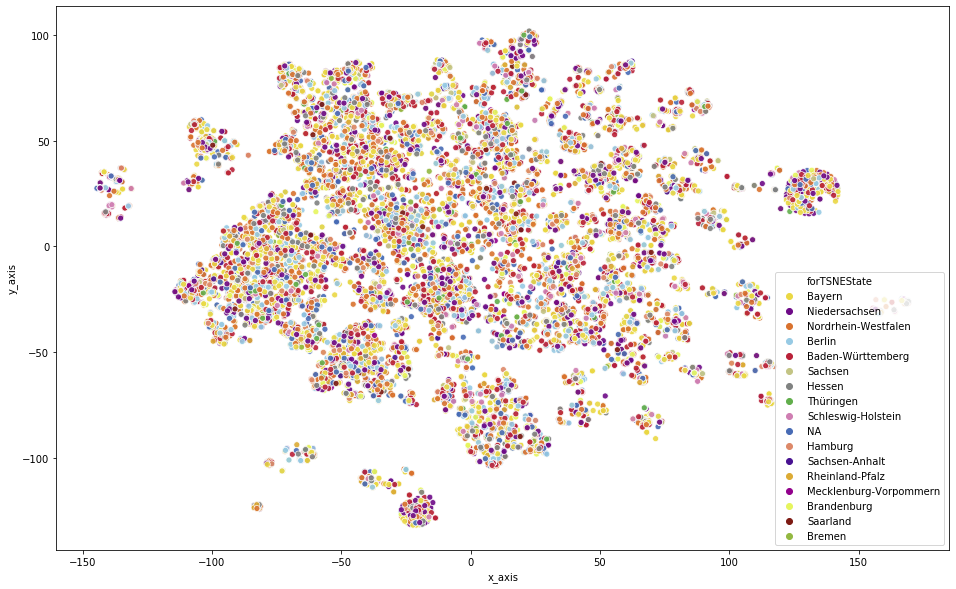

In [71]:
# reviews and forTSNEState
plt.figure(figsize=(16,10))
colors2 = colors[:df_copy['forTSNEState'].nunique()]

sns.scatterplot(
    x='x_axis', y='y_axis',
    hue=df_copy['forTSNEState'],
    data=df_copy[['x_axis','y_axis']],
    legend="full",
    alpha=0.9,
    #palette= sns.color_palette('magma',df_copy['forTSNEState'].nunique())
    palette= sns.color_palette(colors2)
    
)
#sns.palplot(sns.color_palette("RdBu", 10))

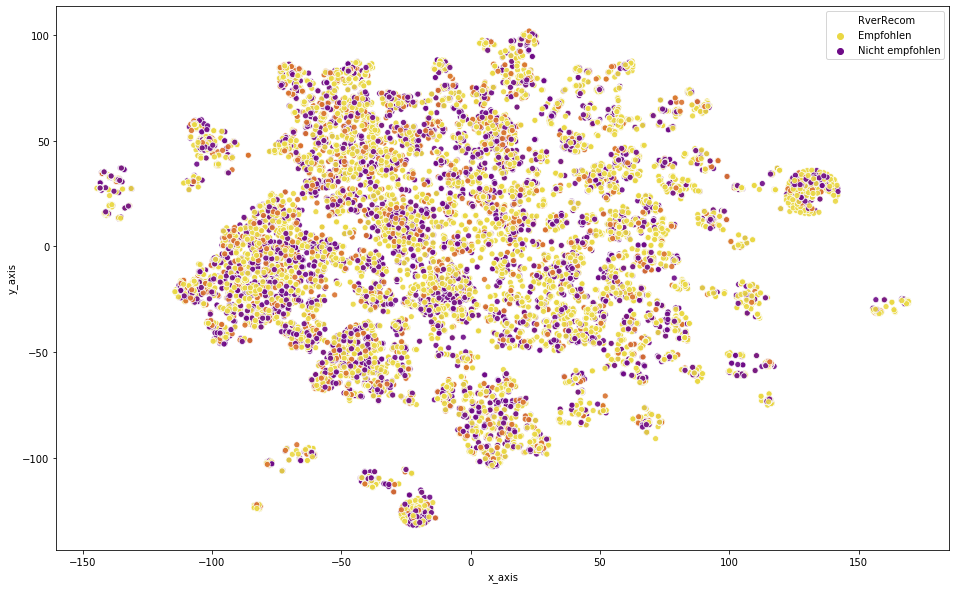

In [72]:
# reviews and RverRecom
plt.figure(figsize=(16,10))
colors2 = colors[:df_copy['RverRecom'].nunique()]

sns.scatterplot(
    x='x_axis', y='y_axis',
    hue=df_copy['RverRecom'],
    data=df_copy[['x_axis','y_axis']],
    legend="full",
    alpha=0.9,
    #palette= sns.color_palette('magma',df_copy['RverRecom'].nunique())
    palette= sns.color_palette(colors2)
    
)
#sns.palplot(sns.color_palette("RdBu", 10))

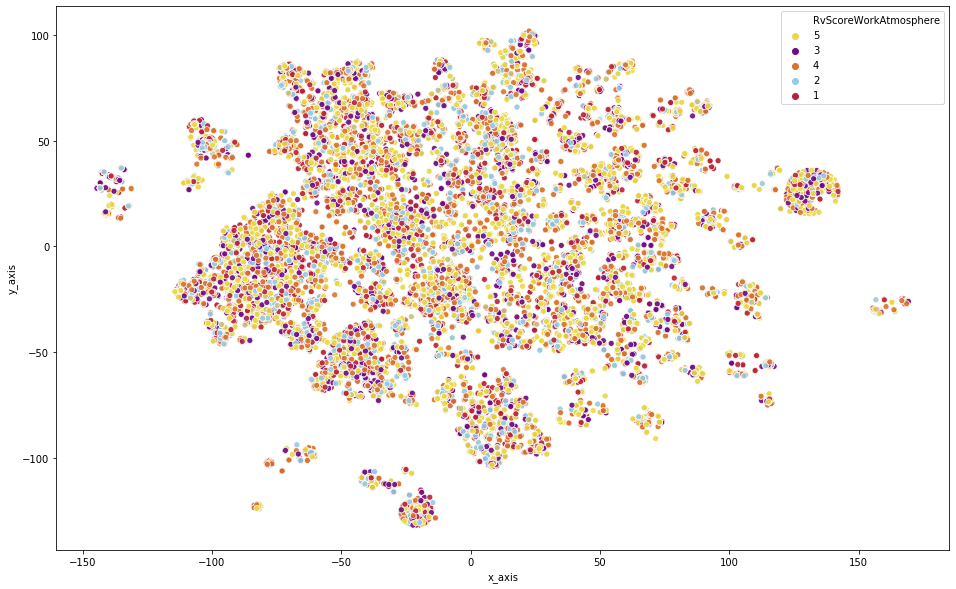

In [79]:
# reviews and RvScoreWorkAtmosphere 
plt.figure(figsize=(16,10))
colors2 = colors[:df_copy['RvScoreWorkAtmosphere'].nunique()]

sns.scatterplot(
    x='x_axis', y='y_axis',
    hue=df_copy['RvScoreWorkAtmosphere'],
    data=df_copy[['x_axis','y_axis']],
    legend="full",
    alpha=0.9,
    #palette= sns.color_palette('magma',df_copy['RvScoreWorkAtmosphere'].nunique())
    palette= sns.color_palette(colors2)
    
)
#sns.palplot(sns.color_palette("RdBu", 10))

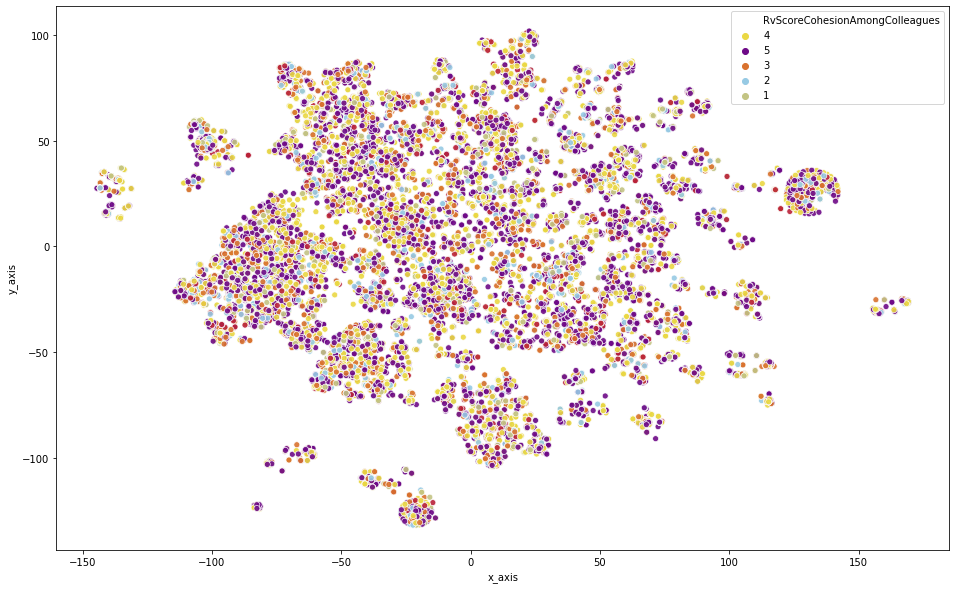

In [74]:
# reviews and RvScoreCohesionAmongColleagues 
plt.figure(figsize=(16,10))
colors2 = colors[:df_copy['RvScoreCohesionAmongColleagues'].nunique()]

sns.scatterplot(
    x='x_axis', y='y_axis',
    hue=df_copy['RvScoreCohesionAmongColleagues'],
    data=df_copy[['x_axis','y_axis']],
    legend="full",
    alpha=0.9,
    #palette= sns.color_palette('magma',df_copy['RvScoreCohesionAmongColleagues'].nunique())
    palette= sns.color_palette(colors2)
    
)
#sns.palplot(sns.color_palette("RdBu", 10))

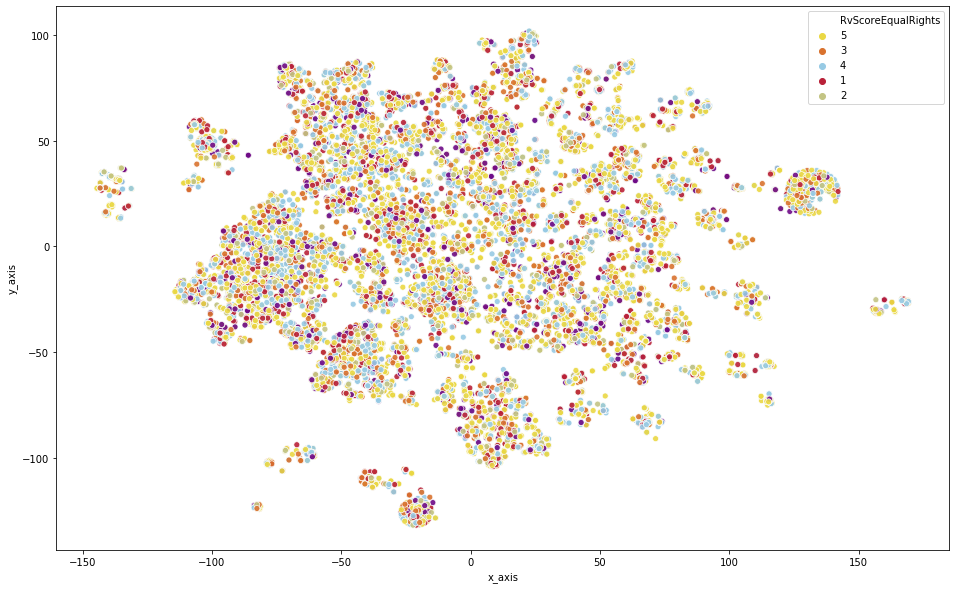

In [75]:
# reviews and RvScoreEqualRights
plt.figure(figsize=(16,10))
colors2 = colors[:df_copy['RvScoreEqualRights'].nunique()]

sns.scatterplot(
    x='x_axis', y='y_axis',
    hue=df_copy['RvScoreEqualRights'],
    data=df_copy[['x_axis','y_axis']],
    legend="full",
    alpha=0.9,
    #palette= sns.color_palette('magma',df_copy['RvScoreEqualRights'].nunique())
    palette= sns.color_palette(colors2)
    
)
#sns.palplot(sns.color_palette("RdBu", 10))

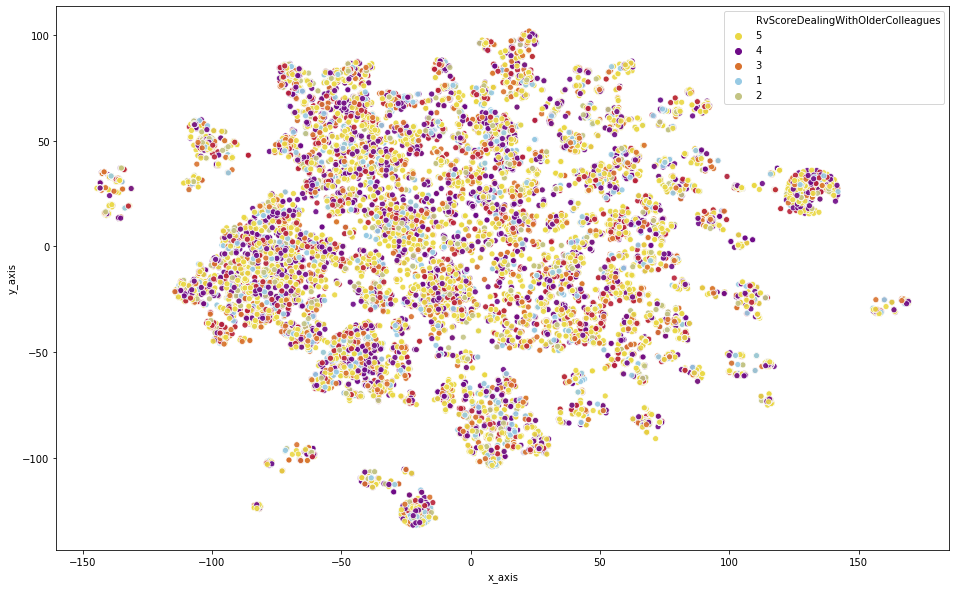

In [76]:
# reviews and RvScoreDealingWithOlderColleagues
plt.figure(figsize=(16,10))
colors2 = colors[:df_copy['RvScoreDealingWithOlderColleagues'].nunique()]

sns.scatterplot(
    x='x_axis', y='y_axis',
    hue=df_copy['RvScoreDealingWithOlderColleagues'],
    data=df_copy[['x_axis','y_axis']],
    legend="full",
    alpha=0.9,
    #palette= sns.color_palette('magma',df_copy['RvScoreDealingWithOlderColleagues'].nunique())
    palette= sns.color_palette(colors2)
    
)
#sns.palplot(sns.color_palette("RdBu", 10))

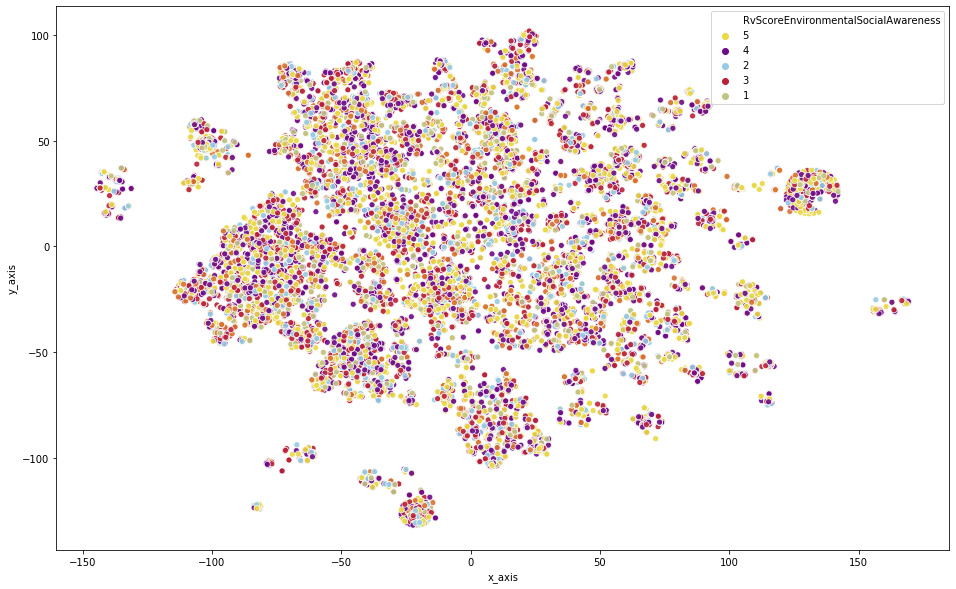

In [77]:
# reviews and RvScoreEnvironmentalSocialAwareness
        
plt.figure(figsize=(16,10))
colors2 = colors[:df_copy['RvScoreEnvironmentalSocialAwareness'].nunique()]

sns.scatterplot(
    x='x_axis', y='y_axis',
    hue=df_copy['RvScoreEnvironmentalSocialAwareness'],
    data=df_copy[['x_axis','y_axis']],
    legend="full",
    alpha=0.9,
    #palette= sns.color_palette('magma',df_copy['RvScoreEnvironmentalSocialAwareness'].nunique())
    palette= sns.color_palette(colors2)
    
)
#sns.palplot(sns.color_palette("RdBu", 10))

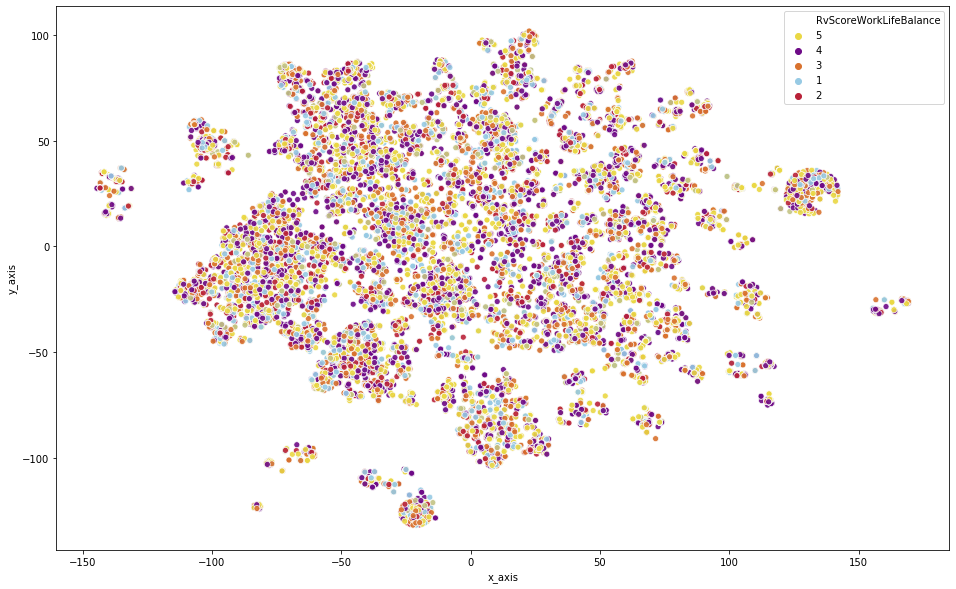

In [78]:
# reviews and RvScoreWorkLifeBalance
plt.figure(figsize=(16,10))
colors2 = colors[:df_copy['RvScoreWorkLifeBalance'].nunique()]

sns.scatterplot(
    x='x_axis', y='y_axis',
    hue=df_copy['RvScoreWorkLifeBalance'],
    data=df_copy[['x_axis','y_axis']],
    legend="full",
    alpha=0.9,
    #palette= sns.color_palette('magma',df_copy['RvScoreWorkLifeBalance'].nunique())
    palette= sns.color_palette(colors2)
    
)
#sns.palplot(sns.color_palette("RdBu", 10))